# Theory questiom

Q1. Explain the fundamental idea behind ensemble techniques. Compare Bagging and Boosting methods.

Answers: Ensemble techniques combine multiple models to make better predictions than a single model. They help reduce errors by averaging or combining different learners. Bagging builds several models independently on random data subsets to reduce variance. Boosting builds models one after another, each focusing on correcting errors made by previous models, which helps reduce bias.



Q2. How does Random Forest reduce overfitting compared to a single decision tree? List two key hyperparameters and their roles.

Answers: Random Forest reduces overfitting by training many decision trees on different random samples and averaging their results, which decreases variance. It also selects random subsets of features at each split, making trees less correlated. Two important hyperparameters are n_estimators (number of trees to build) and max_features (number of features considered for splitting), both controlling diversity and model stability.



Q3. What is Stacking? How does it differ from Bagging and Boosting? Give an example use case.


Answers: Stacking combines predictions from different base models using another model, called a meta-learner, which learns how to best combine them. Unlike bagging and boosting that use the same algorithm repeatedly, stacking mixes various models like KNN, Random Forest, and Logistic Regression. For example, stacking can use outputs from Random Forest and SVM as inputs to a Logistic Regression meta-model for final prediction.


Q4. What is the Out-Of-Bag (OOB) score in Random Forest, and why is it useful?

Answers: In Random Forest, each tree is trained on a bootstrap sample, leaving out about one-third of the data, called out-of-bag samples. The OOB score is the model’s accuracy on these left-out samples. It provides an internal and unbiased estimate of model performance without needing a separate validation or test set.



Q5. Compare AdaBoost and Gradient Boosting in terms of how they handle errors and their typical use cases.

Answers: AdaBoost adjusts weights of misclassified samples so that later models focus on harder cases. Gradient Boosting, instead of changing weights, fits each new model to the residual errors of the previous one. AdaBoost works well for simple binary classification, while Gradient Boosting is more flexible and widely used for regression and classification tasks on structured data.



Q6. Why does CatBoost often perform well on categorical features?

Answers: CatBoost handles categorical data using ordered target statistics that prevent target leakage. It applies ordered boosting, which reduces overfitting and prediction bias. Because it automatically encodes categorical features effectively, CatBoost performs well without needing complex preprocessing steps.



#Pratical questions


In [1]:
# Q7. Apply KNN classifier on the Wine dataset.
# Perform the following:
#  a) Train the model without scaling and compute accuracy.
#  b) Train again with StandardScaler and compute accuracy.
#  c) Use GridSearchCV to find the best 'k' and distance metric.
#  d) Train the optimized model and compare accuracies.

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
print("Accuracy (Unscaled):", accuracy_score(y_test, y_pred_unscaled))
print("\nClassification Report (Unscaled):")
print(classification_report(y_test, y_pred_unscaled, zero_division=0))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("\nAccuracy (Scaled):", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report (Scaled):")
print(classification_report(y_test, y_pred_scaled, zero_division=0))

param_grid = {'n_neighbors': list(range(1, 21)), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("\nBest Parameters from GridSearch:", grid.best_params_)
print("Best Cross-validation Accuracy:", grid.best_score_)

best_knn = KNeighborsClassifier(**grid.best_params_)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)
print("\nOptimized Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_best, zero_division=0))


Accuracy (Unscaled): 0.7222222222222222

Classification Report (Unscaled):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


Accuracy (Scaled): 0.9444444444444444

Classification Report (Scaled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


Best Parameters from GridSearch: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-val

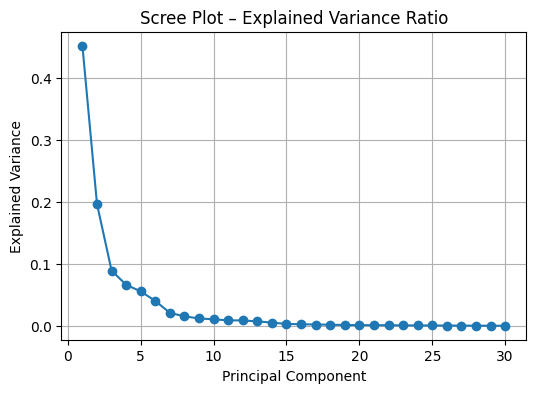

Components to retain 95% variance: 10

Accuracy on Original (Scaled) Data: 0.9590643274853801
Accuracy on PCA (95% variance) Data: 0.9532163742690059


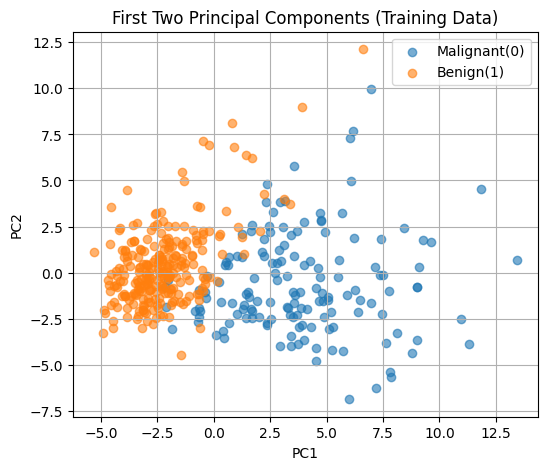

In [2]:
# Q8. Perform PCA on the Breast Cancer dataset.
# Steps:
#  a) Apply PCA and plot the Scree Plot.
#  b) Retain 95% variance and find number of components.
#  c) Train KNN on original and PCA-transformed data.
#  d) Compare accuracies and visualize first two PCs.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_s)
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.title('Scree Plot – Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

pca95 = PCA(n_components=0.95)
X_train_p = pca95.fit_transform(X_train_s)
X_test_p = pca95.transform(X_test_s)
print("Components to retain 95% variance:", pca95.n_components_)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_s, y_train)
acc_original = accuracy_score(y_test, knn_original.predict(X_test_s))

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_p, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_p))

print("\nAccuracy on Original (Scaled) Data:", acc_original)
print("Accuracy on PCA (95% variance) Data:", acc_pca)

pca2 = PCA(n_components=2)
X_train_2 = pca2.fit_transform(X_train_s)
plt.figure(figsize=(6, 5))
for label in np.unique(y_train):
    plt.scatter(X_train_2[y_train == label, 0], X_train_2[y_train == label, 1], label=str(label), alpha=0.6)
plt.title('First Two Principal Components (Training Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Malignant(0)', 'Benign(1)'])
plt.grid(True)
plt.show()


MSE (Euclidean): 4803.90558674207
MSE (Manhattan): 5210.225816542467


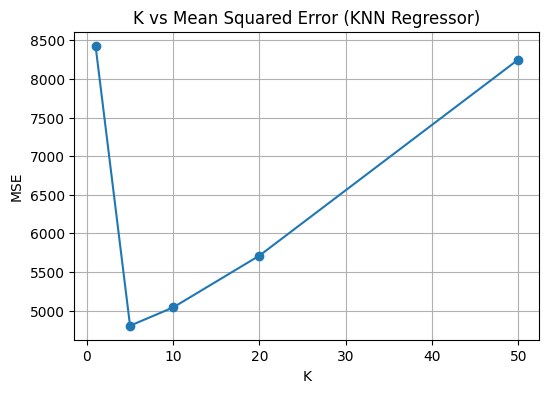

In [3]:
# Q9. Apply KNN Regressor on a synthetic dataset.
# Perform the following:
#  a) Generate data using make_regression().
#  b) Compare Euclidean and Manhattan distance for k=5.
#  c) Plot K vs Mean Squared Error (MSE).

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
mse_euc = mean_squared_error(y_test, knn_euc.predict(X_test))

knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
mse_man = mean_squared_error(y_test, knn_man.predict(X_test))

print("MSE (Euclidean):", mse_euc)
print("MSE (Manhattan):", mse_man)

Ks = [1, 5, 10, 20, 50]
mses = []
for k in Ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(6, 4))
plt.plot(Ks, mses, marker='o')
plt.title('K vs Mean Squared Error (KNN Regressor)')
plt.xlabel('K')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


Algorithm Comparison (Time and Accuracy):
brute {'train_time_sec': 0.005750179290771484, 'accuracy': 0.696969696969697}
kd_tree {'train_time_sec': 0.006581306457519531, 'accuracy': 0.696969696969697}
ball_tree {'train_time_sec': 0.014373779296875, 'accuracy': 0.696969696969697}

Best Algorithm: brute
Top 2 Features: ['Glucose', 'BMI']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


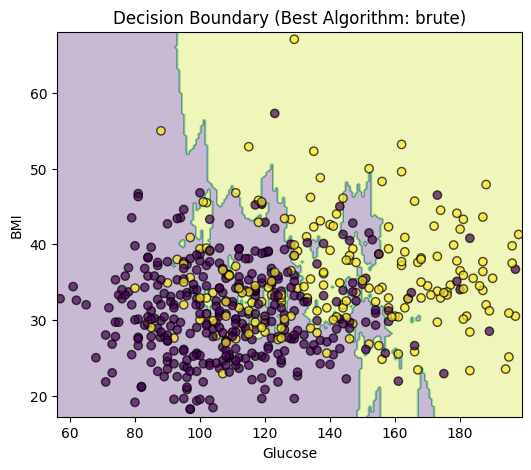

In [4]:
# Q10. Apply KNN classifier on Pima Indians Diabetes dataset.
# Perform the following:
#  a) Handle missing data using KNNImputer.
#  b) Train KNN using 'brute', 'kd_tree', and 'ball_tree' algorithms.
#  c) Compare training time and accuracy.
#  d) Plot decision boundary using two most informative features.

import pandas as pd
import numpy as np
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in cols_missing:
    df[c] = df[c].replace(0, np.nan)

X = df.drop(columns=['Outcome'])
y = df['Outcome']

imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.30, stratify=y, random_state=42)
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    start = time.time()
    model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    model.fit(X_train, y_train)
    train_time = time.time() - start
    acc = accuracy_score(y_test, model.predict(X_test))
    results[algo] = {'train_time_sec': train_time, 'accuracy': acc}

print("Algorithm Comparison (Time and Accuracy):")
for k, v in results.items():
    print(k, v)

best_algo = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
print("\nBest Algorithm:", best_algo)

selector = SelectKBest(mutual_info_classif, k=2)
X_top2 = selector.fit_transform(X_imputed, y)
top2_names = X.columns[selector.get_support()]
print("Top 2 Features:", top2_names.tolist())

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_imputed[top2_names], y, test_size=0.30, stratify=y, random_state=42
)

best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_knn.fit(X_train2, y_train2)

x_min, x_max = X_train2[top2_names[0]].min() - 1, X_train2[top2_names[0]].max() + 1
y_min, y_max = X_train2[top2_names[1]].min() - 1, X_train2[top2_names[1]].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train2[top2_names[0]], X_train2[top2_names[1]], c=y_train2, edgecolor='k', alpha=0.7)
plt.title(f'Decision Boundary (Best Algorithm: {best_algo})')
plt.xlabel(top2_names[0])
plt.ylabel(top2_names[1])
plt.show()
